In [125]:
import warnings
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

warnings.filterwarnings('ignore')

In [126]:
df = pd.read_csv('../data/tranformed_train_data.csv')
df.head()

,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area,city_region,region_cuisine,week_sin,week_cos,discount_per,promoted
0,55.0,1885.0,136.83,152.29,0,0,5.181784,Beverages,Thai,647,56,TYPE_C,2.25,647_56,56_Thai,0.120208,0.992749,0.101517,0
1,55.0,1993.0,136.83,135.83,0,0,5.602119,Beverages,Thai,647,56,TYPE_C,2.25,647_56,56_Thai,0.120208,0.992749,-0.007362,0
2,55.0,2539.0,134.86,135.86,0,0,5.247024,Beverages,Thai,647,56,TYPE_C,2.25,647_56,56_Thai,0.120208,0.992749,0.007361,0
3,55.0,2139.0,339.50,437.53,0,0,4.007333,Beverages,Indian,647,56,TYPE_C,2.25,647_56,56_Indian,0.120208,0.992749,0.224053,0
4,55.0,2631.0,243.50,242.50,0,0,3.713572,Beverages,Indian,647,56,TYPE_C,2.25,647_56,56_Indian,0.120208,0.992749,-0.004124,0


In [127]:
cat_cols = [col for col in df.columns if df[col].dtypes == 'O']
for col in cat_cols:
    print(df[col].value_counts())
# print(cat_cols)

category
Beverages       127890
Rice Bowl        33408
Sandwich         33291
Pizza            33138
Starters         29941
Other Snacks     29379
Desert           29294
Salad            28559
Pasta            27694
Seafood          26916
Biryani          20614
Extras           13562
Soup             12675
Fish             10187
Name: count, dtype: int64
cuisine
Italian        122925
Thai           118216
Indian         112612
Continental    102795
Name: count, dtype: int64
center_type
TYPE_A    262881
TYPE_C     99593
TYPE_B     94074
Name: count, dtype: int64
city_region
590_56    54746
526_34    43525
638_56    20047
522_56    13459
517_56    13109
604_56    13062
699_85    12098
647_56    11833
576_34    11456
614_85    11332
676_34    11177
593_77    10804
685_56     6993
700_56     6891
713_85     6853
579_56     6843
679_56     6801
456_56     6716
703_56     6706
698_23     6434
577_56     6389
599_56     6296
596_71     6293
648_34     6090
602_34     6057
659_77     6053
654_

In [128]:
# category, cuisine and center_type in ONE-HOT-ENCODING
df = pd.get_dummies(df, columns=['category','center_type', 'cuisine'], drop_first=True)
df.head()

,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area,...,category_Salad,category_Sandwich,category_Seafood,category_Soup,category_Starters,center_type_TYPE_B,center_type_TYPE_C,cuisine_Indian,cuisine_Italian,cuisine_Thai
0,55.0,1885.0,136.83,152.29,0,0,5.181784,647,56,2.25,...,False,False,False,False,False,False,True,False,False,True
1,55.0,1993.0,136.83,135.83,0,0,5.602119,647,56,2.25,...,False,False,False,False,False,False,True,False,False,True
2,55.0,2539.0,134.86,135.86,0,0,5.247024,647,56,2.25,...,False,False,False,False,False,False,True,False,False,True
3,55.0,2139.0,339.50,437.53,0,0,4.007333,647,56,2.25,...,False,False,False,False,False,False,True,True,False,False
4,55.0,2631.0,243.50,242.50,0,0,3.713572,647,56,2.25,...,False,False,False,False,False,False,True,True,False,False


In [129]:
# Frequency Encoding for city_region and region_encoding
df['city_region_encoded'] = df['city_region'].map(df['city_region'].value_counts()/len(df))
df['region_cuisine_encoded'] = df['region_cuisine'].map(df['region_cuisine'].value_counts()/len(df))

df.drop(['city_region','region_cuisine'],axis=1,inplace=True)

In [130]:
bool_cols = df.columns[df.dtypes == 'bool']
print(bool_cols)

df[bool_cols] = df[bool_cols].astype(int)

Index(['category_Biryani', 'category_Desert', 'category_Extras',
       'category_Fish', 'category_Other Snacks', 'category_Pasta',
       'category_Pizza', 'category_Rice Bowl', 'category_Salad',
       'category_Sandwich', 'category_Seafood', 'category_Soup',
       'category_Starters', 'center_type_TYPE_B', 'center_type_TYPE_C',
       'cuisine_Indian', 'cuisine_Italian', 'cuisine_Thai'],
      dtype='object')


In [131]:
df.columns = df.columns.str.replace(' ', '_')
df.columns

Index(['center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'num_orders', 'city_code',
       'region_code', 'op_area', 'week_sin', 'week_cos', 'discount_per',
       'promoted', 'category_Biryani', 'category_Desert', 'category_Extras',
       'category_Fish', 'category_Other_Snacks', 'category_Pasta',
       'category_Pizza', 'category_Rice_Bowl', 'category_Salad',
       'category_Sandwich', 'category_Seafood', 'category_Soup',
       'category_Starters', 'center_type_TYPE_B', 'center_type_TYPE_C',
       'cuisine_Indian', 'cuisine_Italian', 'cuisine_Thai',
       'city_region_encoded', 'region_cuisine_encoded'],
      dtype='object')

In [132]:
df.head()

,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area,...,category_Seafood,category_Soup,category_Starters,center_type_TYPE_B,center_type_TYPE_C,cuisine_Indian,cuisine_Italian,cuisine_Thai,city_region_encoded,region_cuisine_encoded
0,55.0,1885.0,136.83,152.29,0,0,5.181784,647,56,2.25,...,0,0,0,0,1,0,0,1,0.025918,0.126915
1,55.0,1993.0,136.83,135.83,0,0,5.602119,647,56,2.25,...,0,0,0,0,1,0,0,1,0.025918,0.126915
2,55.0,2539.0,134.86,135.86,0,0,5.247024,647,56,2.25,...,0,0,0,0,1,0,0,1,0.025918,0.126915
3,55.0,2139.0,339.50,437.53,0,0,4.007333,647,56,2.25,...,0,0,0,0,1,1,0,0,0.025918,0.097839
4,55.0,2631.0,243.50,242.50,0,0,3.713572,647,56,2.25,...,0,0,0,0,1,1,0,0,0.025918,0.097839


In [133]:
# X = df.drop(['emailer_for_promotion','homepage_featured','num_orders'],axis=1)
# X = df.drop(['promoted','city_region_encoded','region_cuisine_encoded','num_orders'],axis=1)
# X = df.drop(['promoted','region_cuisine_encoded','city_region_encoded','num_orders','base_price','center_id','meal_id','city_code','region_code'],axis=1)
X = df.drop(['promoted','region_cuisine_encoded','city_region_encoded','num_orders','checkout_price','center_id','meal_id'],axis=1)
y = df['num_orders']

In [134]:
X.corr()

,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,op_area,week_sin,week_cos,discount_per,category_Biryani,...,category_Salad,category_Sandwich,category_Seafood,category_Soup,category_Starters,center_type_TYPE_B,center_type_TYPE_C,cuisine_Indian,cuisine_Italian,cuisine_Thai
base_price,1.000000,0.171176,0.057154,-0.002035,-0.001923,0.020334,0.003012,-0.015731,0.090958,0.144519,...,-0.086115,-0.085372,0.484357,-0.129057,-0.115451,0.017400,-0.021948,0.033238,-0.202578,-0.478326
emailer_for_promotion,0.171176,1.000000,0.390534,-0.005234,-0.007462,-0.018859,0.011596,0.016133,0.477567,-0.064625,...,-0.007739,0.049495,0.094457,-0.050220,-0.034307,-0.005064,0.008600,-0.052190,0.011145,-0.117787
homepage_featured,0.057154,0.390534,1.000000,0.008640,0.003605,0.039380,0.030255,0.015450,0.338010,-0.074107,...,-0.039199,0.004285,0.025724,-0.038733,-0.030740,0.001877,-0.030601,-0.059371,-0.049736,0.040783
city_code,-0.002035,-0.005234,0.008640,1.000000,0.042686,0.112351,0.000682,0.000242,0.011779,-0.006409,...,-0.003912,-0.003723,0.002864,0.038829,-0.004885,0.004382,0.088261,-0.008286,-0.009568,0.020253
region_code,-0.001923,-0.007462,0.003605,0.042686,1.000000,0.027647,-0.002484,0.001159,0.008097,0.001080,...,-0.002485,-0.003063,-0.000111,0.033747,-0.003075,-0.055865,0.017814,-0.004475,-0.007721,0.021114
op_area,0.020334,-0.018859,0.039380,0.112351,0.027647,1.000000,0.001350,-0.002240,-0.010785,0.042427,...,-0.020304,-0.022867,0.019224,0.057605,0.008077,0.370814,-0.404007,0.007030,-0.034537,0.028955
week_sin,0.003012,0.011596,0.030255,0.000682,-0.002484,0.001350,1.000000,0.055828,-0.004322,0.005019,...,-0.035822,0.002747,0.004726,-0.005143,0.003708,-0.002282,0.000862,0.004465,-0.015639,0.008845
week_cos,-0.015731,0.016133,0.015450,0.000242,0.001159,-0.002240,0.055828,1.000000,-0.019846,0.003489,...,-0.012826,0.001804,0.008494,0.002292,0.002296,-0.000131,0.000352,0.004654,-0.004125,0.003536
discount_per,0.090958,0.477567,0.338010,0.011779,0.008097,-0.010785,-0.004322,-0.019846,1.000000,-0.066144,...,-0.056850,-0.017789,0.051644,-0.035562,-0.085756,-0.015584,0.013252,0.069150,-0.053212,-0.060901
category_Biryani,0.144519,-0.064625,-0.074107,-0.006409,0.001080,0.042427,0.005019,0.003489,-0.066144,1.000000,...,-0.056173,-0.060986,-0.054429,-0.036746,-0.057609,0.027604,-0.040941,0.380029,-0.131997,-0.128540


In [135]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=45)

Few points on Normalization & Standardization:

Normalization and standardization are two common techniques used in data preprocessing to transform numerical features, making them suitable for machine learning models.


Why to Scale/Normalize features ?
- Faster Convergence (if not done the feature having higher range will have dominance in updating weights)
- For KNN, K-Means where distance plays the major role (take an example of age(12 to 100),salary(10000,1000000) to predict height, here the contribution of salary dominates the computed euclidean distance.)


- Normalization: Normalization rescales the values of a feature to a fixed range, typically [0, 1] or [-1, 1]. It ensures that all features have the same scale, preventing features with larger magnitudes from dominating the learning process.
    - X' = (X - Xmin)/(Xmax-Xmin)
    - When to use ?
        - When features have different scales but should be treated equally.
        - When the data follows a non-Gaussian (non-normal) distribution.
        - When using machine learning algorithms like:
            - K-Nearest Neighbors (KNN)
            - Neural Networks
            - Support Vector Machines (SVM)
            - Principal Component Analysis (PCA)
    - DrawBacks:
        - Affected by outliers: If the dataset contains extreme values, the transformation gets skewed.
        - Loses original distribution information: It compresses data into a fixed range, which might not be ideal for certain applications.

- Standardization:
    - Standardization transforms data so that it has a mean of 0 and a standard deviation of 1. This technique is particularly useful when the data follows a Gaussian distribution.
    - X' = (X-u)/sigma
    - When to use ?
        - When data follows a Gaussian (normal) distribution.
        - When machine learning algorithms assume a normal distribution, such as:
            - Linear Regression
            - Logistic Regression
            - Principal Component Analysis (PCA)
            - K-Means Clustering
            - Support Vector Machines (SVM) with RBF Kernel
    - Advantages:
        - Less affected by outliers compared to min-max normalization.
        - Keeps the original distribution of data while centering it around zero.
    - Drawbacks:
        - If the data is not normally distributed, standardization might not be meaningful.
        - The transformed values are unbounded (they don’t have a fixed range like normalization).

Which to use when ?
- Use Normalization (Min-Max Scaling) When:
    - Your data doesn’t follow a normal distribution.
    - You need all features on the same scale (e.g., when using distance-based models like KNN).
    - Your data is mostly within a known range, and you want to maintain that range.
    
- Use Standardization (Z-score Scaling) When:
    - Your data follows a Gaussian distribution.
    - The model assumes normally distributed data (e.g., logistic regression, linear regression, PCA).
    - The data has outliers that could distort min-max scaling.
    

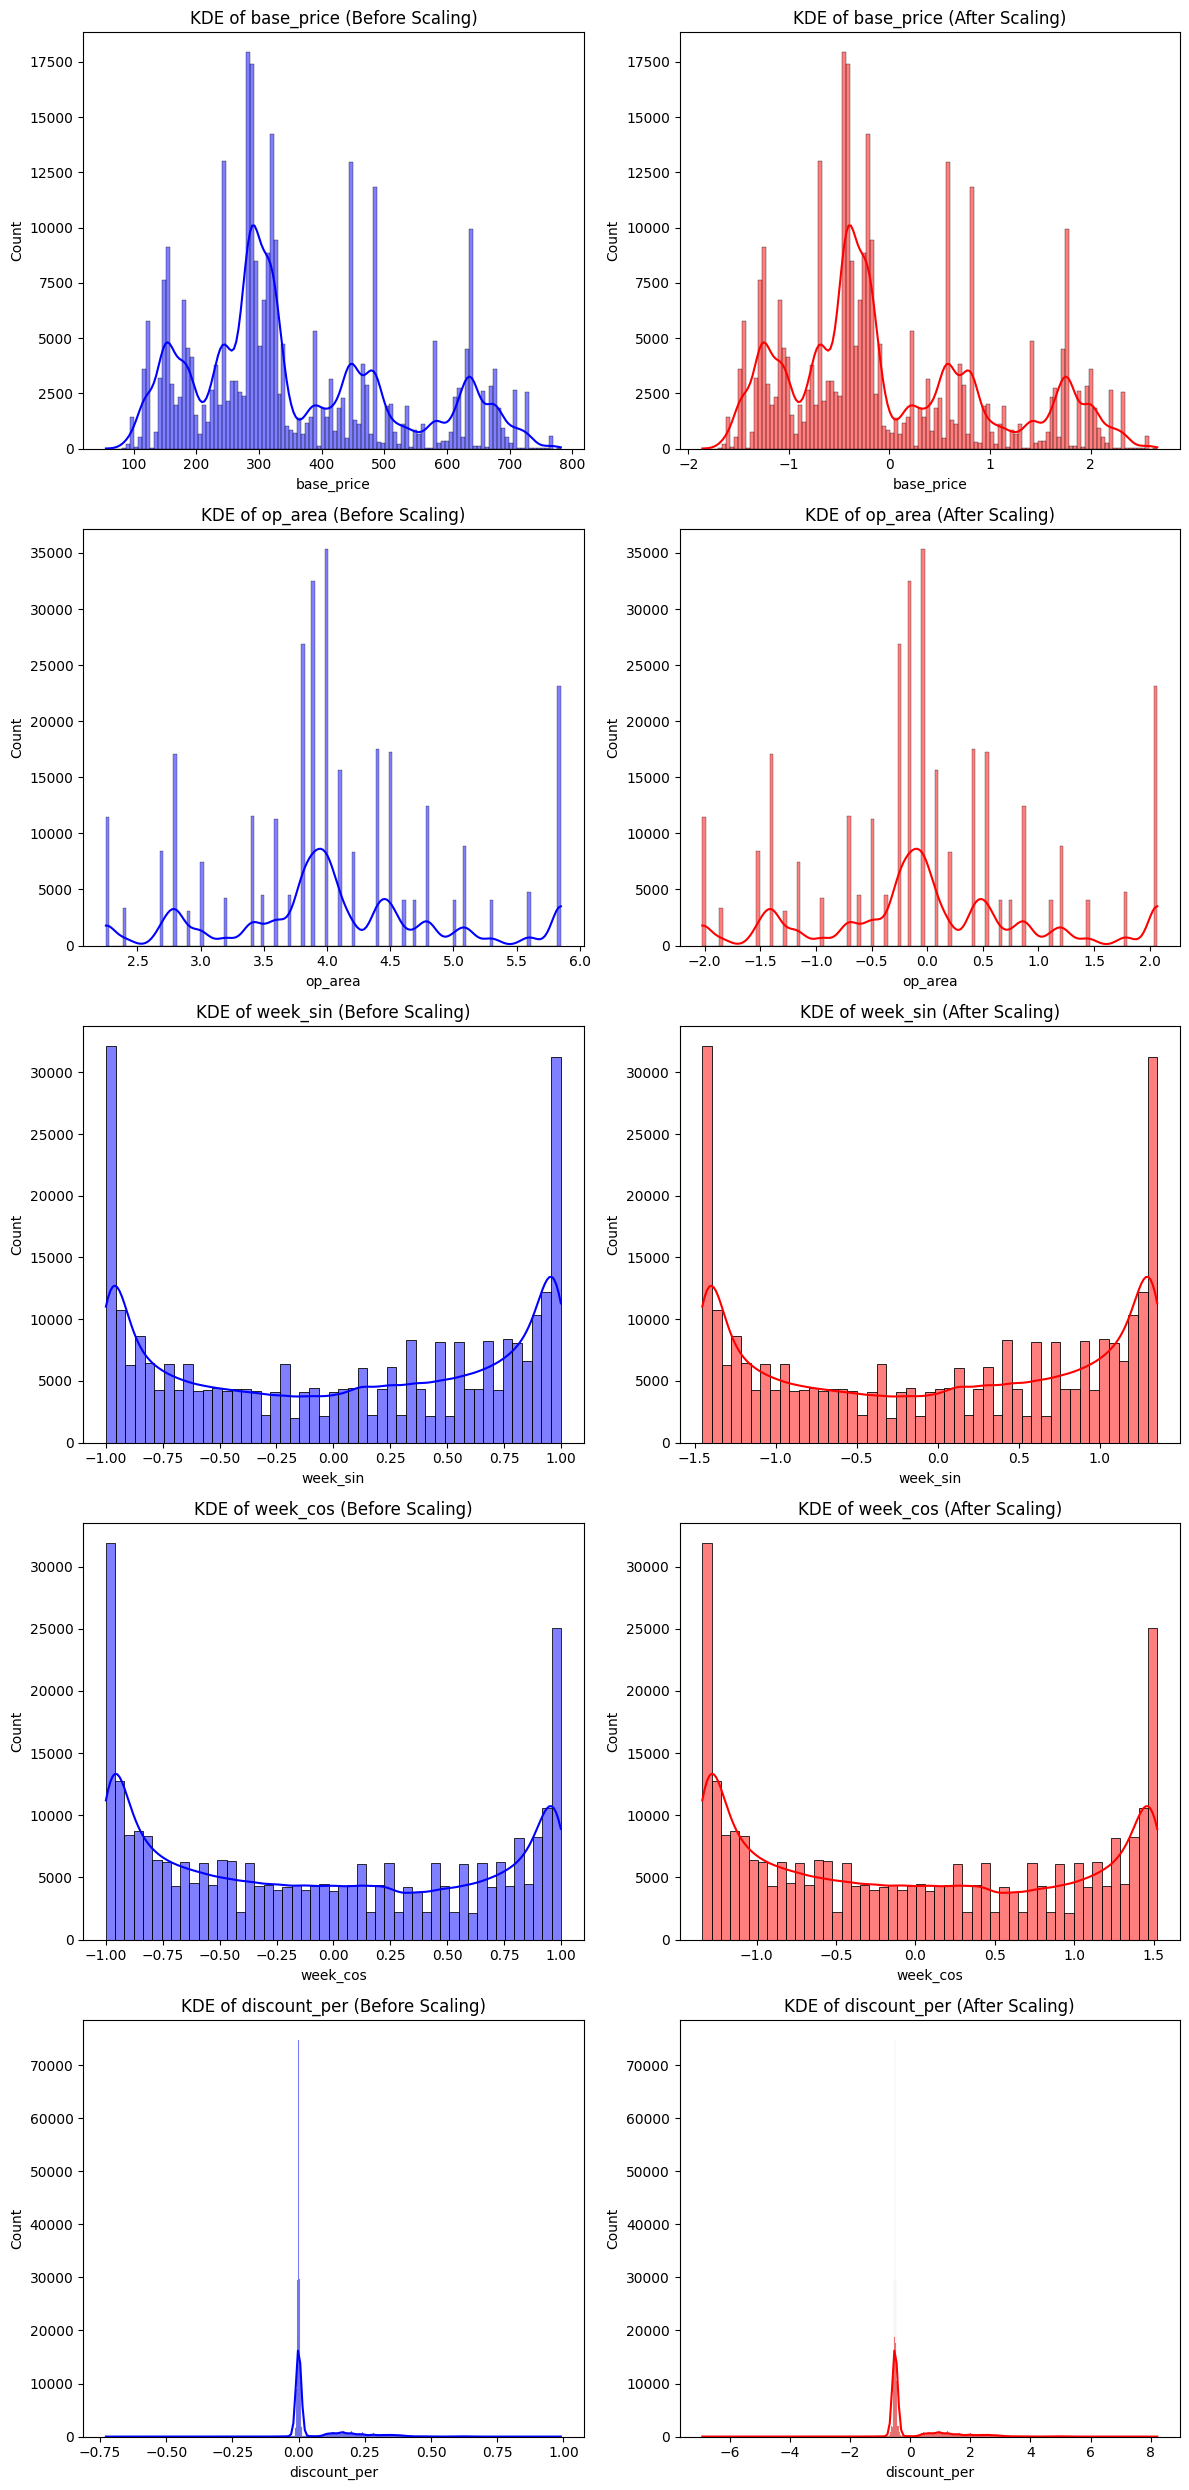

In [136]:
from sklearn.preprocessing import StandardScaler

cols_to_scale = [
    'base_price', 'op_area', 
    'week_sin', 'week_cos', 'discount_per', 
    # 'city_region_encoded', 'region_cuisine_encoded', 'checkout_price'
]

X_test_scaled = X_test.copy()
X_train_scaled = X_train.copy()

scaler = StandardScaler()
X_train_scaled[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_test_scaled[cols_to_scale] = scaler.fit_transform(X_test[cols_to_scale])

fig, axes = plt.subplots(nrows=len(cols_to_scale), ncols=2, figsize=(12, 25))

for i, col in enumerate(cols_to_scale):
    # sns.kdeplot(df[col], ax=axes[i, 0], fill=True, color="blue", label="Original")
    sns.histplot(X_train[col],ax=axes[i, 0],kde=True, fill=True, color="blue", label="Original")
    axes[i, 0].set_title(f"KDE of {col} (Before Scaling)")
    
    # sns.kdeplot(df_scaled[col], ax=axes[i, 1], fill=True, color="red", label="Scaled")
    sns.histplot(X_train_scaled[col], ax=axes[i, 1], kde=True, fill=True, color="red", label="Scaled")
    axes[i, 1].set_title(f"KDE of {col} (After Scaling)")

plt.tight_layout()
plt.show()


In [137]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso 
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [138]:
def evaluate_model(true_value,pred_value):
    mae = mean_absolute_error(true_value,pred_value)
    mse = mean_squared_error(true_value,pred_value)
    r2_square = r2_score(true_value,pred_value)
    rmse = np.sqrt(mse)

    return mae,rmse,r2_square

In [139]:
### Begin Model training 
models = {
    # "Lasso": Lasso(),
    # "Ridge": Ridge(),
    'lightgbm': LGBMRegressor(),
    'XgBoost Regressor': XGBRegressor(),
    'Gradient Regressor': GradientBoostingRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    # "Linear Regression": LinearRegression(),
    "K-Neighbours Regressor": KNeighborsRegressor(),
    # "Decision Tree": DecisionTreeRegressor(),
    # 'AdaBoost Regressor': AdaBoostRegressor(),
    
}

for key,value in models.items():
    model = value 
    # model.fit(X_train,y_train)
    model.fit(X_train_scaled,y_train)

    # y_test_pred = model.predict(X_test)
    # y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test_scaled)
    y_train_pred = model.predict(X_train_scaled)

    # evaluate the model 
    mae_test, rmse_test, r2_test = evaluate_model(y_test,y_test_pred)

    mae_train, rmse_train, r2_train = evaluate_model(y_train,y_train_pred) 

    print("Model: ",key)

    print(" Model Performance on Training Set: ")
    print(" - Root Mean Square Error: {:.4f}".format(rmse_train))
    print(" - Mean Absolute Error: {:.4f}".format(rmse_train))
    print(" - R2_Score: {:.4f}".format(r2_train))
    print()
    print(" Model Performance on Test Set: ")
    print(" - Root Mean Square Error: {:.4f}".format(rmse_test))
    print(" - Mean Absolute Error: {:.4f}".format(rmse_test))
    print(" - R2_Score: {:.4f}".format(r2_test))
    print()

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005772 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 926
[LightGBM] [Info] Number of data points in the train set: 305887, number of used features: 27
[LightGBM] [Info] Start training from score 4.887413
Model:  lightgbm
 Model Performance on Training Set: 
 - Root Mean Square Error: 0.5768
 - Mean Absolute Error: 0.5768
 - R2_Score: 0.7704

 Model Performance on Test Set: 
 - Root Mean Square Error: 0.5791
 - Mean Absolute Error: 0.5791
 - R2_Score: 0.7680

Model:  XgBoost Regressor
 Model Performance on Training Set: 
 - Root Mean Square Error: 0.5297
 - Mean Absolute Error: 0.5297
 - R2_Score: 0.8063

 Model Performance on Test Set: 
 - Root Mean Square Error: 0.5782
 - Mean Absolute Error: 0.5782
 - R2_Score: 0.7687

Model:  Gradient Regressor
 Model Performance on Training Set: 
 - 

### Hyper-Paramter-Tuning

In [147]:
# so we will take KNN and Random-Forest Regressor 

knn_params = {"n_neighbors": [2,3,10,20,40,50]}

rf_params = {
    "max_depth": [5,8,15,10,None],
    "max_features": [5,7,8,"auto"],
    "min_samples_split": [2,8,15,20],
    "n_estimators": [100,200,500,1000]
}

ada_params = {
    "n_estimators": [50,55,60,65,70,80],
    "loss": ['linear','square','exponential']
}

gradientboost_params = {
    "loss": ['squared_error','huber','absolute_error'],
    "criterion": ['friedman_mse','squared_error','mse'],
    "min_samples_split": [2,8,15,20],
    "n_estimators": [100,200,500,1000],
    "max_depth": [5,8,15,None,10],
    "learning_rate": [0.1,0.01,0.02,0.2]
}

xgboost_params = {
    "learning_rate": [0.1,0.01],
    "max_depth": [5,8,15,None,10],
    "n_estimators": [100,200,300],
    "colsample_bytree": [0.5,0.8,1,0.3]
}

lightgbm_params = {
    'num_leaves': np.arange(50, 2000, 50),  
    'max_depth': np.arange(9, 30, 2),  
    'learning_rate': [0.01, 0.02],  
    'n_estimators': [2000, 3000, 4000],  
    'subsample': [0.6, 0.8, 1.0],  
    'colsample_bytree': [0.6, 0.8, 1.0] 
}

As we saw LightGBM, Random-Forest & XgBoost have higher accuracy so we will tune them.

In [148]:
tunning_models = [
    ('LGBM Regression',LGBMRegressor(),lightgbm_params),
    # ('XgBoost Regression',XGBRegressor(),xgboost_params),
    # ('Random Forest', RandomForestRegressor(),rf_params)
    # ('KNN',KNeighborsRegressor(),knn_params),
    # ('AdaBoost Regression',AdaBoostRegressor(),ada_params),
    # ('GradientBoost Regression',GradientBoostingRegressor(),gradientboost_params),
]

In [149]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
best_tuned_model = {}

for name,model,params in tunning_models:
    randomcv = RandomizedSearchCV(estimator=model,param_distributions=params,n_iter=200,cv=3,verbose=1,refit=True,n_jobs=-1)
    # randomcv.fit(X_train,y_train)
    randomcv.fit(X_train_scaled,y_train)
    best_tuned_model[name] = randomcv
    model_param[name] = randomcv.best_params_
    print(f'Completed Tunning {name}: ',randomcv.best_params_,end="\n\n")


Fitting 3 folds for each of 200 candidates, totalling 600 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.036892 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 926
[LightGBM] [Info] Number of data points in the train set: 305887, number of used features: 27
[LightGBM] [Info] Start training from score 4.887413
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Completed Tunning LGBM Regression:  {'subsample': 0.8, 'num_leaves': 800, 'n_estimators': 2000, 'max_depth': 19, 'learning_rate': 0.01, 'colsample_bytree': 0.6}



In [ ]:
print("Tunned Model Performance: \n")

for name,tuned_model in best_tuned_model.items():

    # y_test_pred = tuned_model.predict(X_test)
    # y_train_pred = tuned_model.predict(X_train)
    y_test_pred = tuned_model.predict(X_test_scaled)
    y_train_pred = tuned_model.predict(X_train_scaled)

    # evaluate the model 
    mae_test, rmse_test, r2_test = evaluate_model(y_test,y_test_pred)

    mae_train, rmse_train, r2_train = evaluate_model(y_train,y_train_pred) 

    print("Model: ",name)
    print("Models Best Params: ", model_param[name],end="\n\n")

    print(" Model Performance on Training Set: ")
    print(" - Root Mean Square Error: {:.4f}".format(rmse_train))
    print(" - Mean Absolute Error: {:.4f}".format(rmse_train))
    print(" - R2_Score: {:.4f}".format(r2_train))
    print()
    print(" Model Performance on Test Set: ")
    print(" - Root Mean Square Error: {:.4f}".format(rmse_test))
    print(" - Mean Absolute Error: {:.4f}".format(rmse_test))
    print(" - R2_Score: {:.4f}".format(r2_test))
    print()

Tunned Model Performance: 

Model:  LGBM Regression
Models Best Params:  {'subsample': 0.8, 'num_leaves': 650, 'n_estimators': 4000, 'max_depth': 15, 'learning_rate': 0.01, 'colsample_bytree': 0.6}

 Model Performance on Training Set: 
 - Root Mean Square Error: 0.3388
 - Mean Absolute Error: 0.3388
 - R2_Score: 0.9208

 Model Performance on Test Set: 
 - Root Mean Square Error: 0.4471
 - Mean Absolute Error: 0.4471
 - R2_Score: 0.8617



Faced few warnings:  
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines  
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.045022 seconds.  
You can set force_col_wise=true to remove the overhead.  
[LightGBM] [Info] Total Bins 1360  
[LightGBM] [Info] Number of data points in the train set: 305887, number of used features: 31  
[LightGBM] [Info] Start training from score 4.887413  
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf  

- Splitting Warnings
  [LightGBM] [Warning] No further splits with positive gain, best gain: -inf

  - LightGBM couldn’t find beneficial splits for some trees.
  - Possible reasons:
    - Feature redundancy – Many features might be similar, reducing split gains.
    - Insufficient data variation – Some features might have constant values.
    - Regularization too strong – Hyperparameters like min_gain_to_split, min_data_in_leaf, or max_depth might be too restrictive.

### To Be Noted:

- Using the new added feature 'promoted', 'city_region_encoded','region_cuisine_encoded' does not improve the model.

In [151]:
import pickle

# Save the model
with open('../models/lgbm_model.pkl', 'wb') as f:
    pickle.dump(best_tuned_model['LGBM Regression'], f)

# Save the scaler
with open('../models/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)